In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numpy import exp, log, sqrt
from scipy.special import erf

In [2]:
def bsexact(sigma: float, R: float, K: float, T: float, s: float):
    d1 = (log(s/K)+(R+0.5*sigma**2)*T)/(sigma*sqrt(T))
    d2 = d1-sigma*sqrt(T)
    F = 0.5*s*(1+erf(d1/sqrt(2)))-exp(-R*T)*K*0.5*(1+erf(d2/sqrt(2)))
    return F

European Call Option Price: 0.5584
European Put Option Price: 0.6304


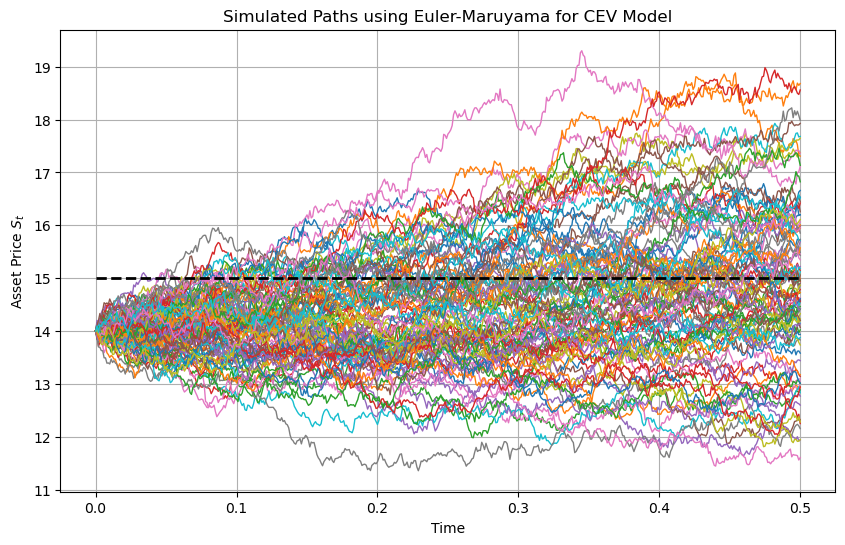

In [3]:
# Parameters for the CEV model
r = 0.1          # Risk-free rate
sigma = 0.25     # Volatility
gamma = 0.8      # Elasticity parameter (CEV parameter)
S0 = 14          # Initial value of the asset (e.g. stock price)
T = 0.5          # Time horizon
N = 500          # Number of time steps
dt = T / N       # Time step size
n_simulations = 100  # Number of simulation paths
K = 15           # Strike price of the option

# Generate random Brownian increments
dW = np.random.normal(0, np.sqrt(dt), (n_simulations, N))

# Initialize array to store the simulated paths
S = np.zeros((n_simulations, N + 1))
S[:, 0] = S0

# Euler-Maruyama method to simulate the paths
for i in range(N):
    S[:, i+1] = S[:, i] + r * S[:, i] * dt + sigma * S[:, i]**gamma * dW[:, i]

# Compute the payoff at maturity for each simulation path
payoffs_call = np.maximum(S[:, -1] - K, 0)
payoffs_put = np.maximum(K-S[:, -1], 0)

# Calculate the mean of the payoffs
mean_payoff_call = np.mean(payoffs_call)
mean_payoff_put = np.mean(payoffs_put)

# Calculate the standard deviation of the payoffs
std_payoff_call = np.std(payoffs_call)
std_payoff_put = np.std(payoffs_put)

# Discount the mean payoff to present value
call_option_price = np.exp(-r * T) * mean_payoff_call
put_option_price = np.exp(-r * T) * mean_payoff_put

# Output the call option price
print(f"European Call Option Price: {call_option_price:.4f}")
print(f"European Put Option Price: {put_option_price:.4f}")
# Plotting the simulated paths
plt.figure(figsize=(10, 6))
for j in range(n_simulations):
    plt.plot(np.linspace(0, T, N+1), S[j, :], lw=1)
# Plot the strike price
plt.plot([0, T], [K, K], 'k--', lw=2)
plt.title('Simulated Paths using Euler-Maruyama for CEV Model')
plt.xlabel('Time')
plt.ylabel('Asset Price $S_t$')
plt.grid(True)
plt.show()

100%|██████████| 1000/1000 [00:07<00:00, 131.99it/s]


Time step sizes:  [100, 250, 500, 1000]
Discretization Errors:  [0.004531023981814042, 0.0016662867284513716, 0.003303187564986043, 0.006929308016054958]


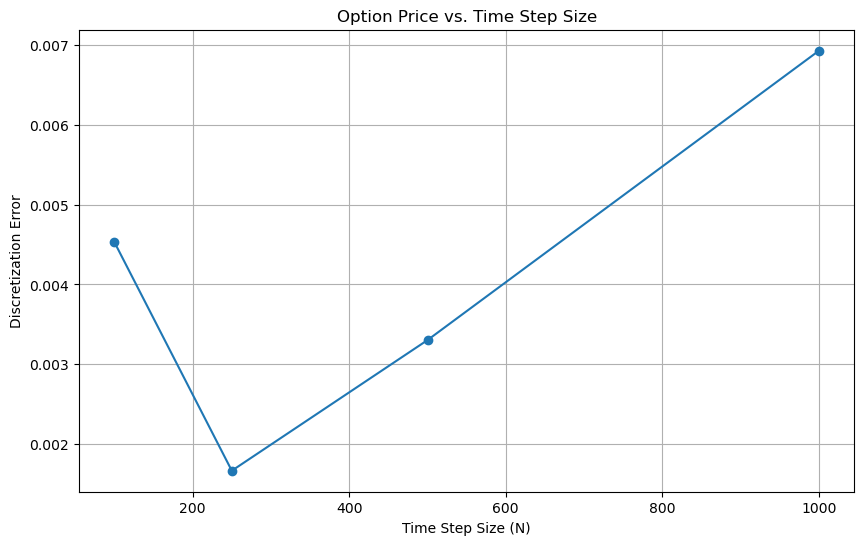

In [13]:
### DISCRETIZATION ERROR ###

# Function to simulate the option price with given time steps (N)
def simulate_option_price(N):
    # Parameters for the CEV model
    r = 0.1          # Risk-free rate
    sigma = 0.25     # Volatility
    gamma = 1      # Elasticity parameter (CEV parameter)
    S0 = 14          # Initial value of the asset (e.g. stock price)
    T = 0.5          # Time horizon
    dt = T / N       # Time step size
    n_simulations = int(1e6)  # Number of simulation paths #OBS!!! Need to be quite large in order to see the discretization error
    K = 15           # Strike price of the option

    dW = np.random.normal(0, np.sqrt(dt), (n_simulations, N))

    # Simulate paths
    S = np.zeros((n_simulations, N + 1))
    S[:, 0] = S0
    for i in tqdm(range(N)):
        S[:, i+1] = S[:, i] + r * S[:, i] * dt + sigma * S[:, i]**gamma * dW[:, i]

    # Compute the payoff at maturity
    payoffs = np.maximum(S[:, -1] - K, 0)
    mean_payoff = np.mean(payoffs)
    call_option_price = np.exp(-r * T) * mean_payoff
    F = bsexact(sigma, r, K, T, S0)

    discretization_error = abs(call_option_price - F)
    return discretization_error

# Run simulations with different time steps
N_values = [50, 100, 200, 400]
discretization_errors = [simulate_option_price(N) for N in N_values]

# Print the results
print("Time step sizes: ", N_values)
print("Discretization Errors: ", discretization_errors)

# Plot the option price as a function of the time step size
plt.figure(figsize=(10, 6))
plt.plot(N_values, discretization_errors, 'o-')
plt.title('Discretization Error vs. Time Step Size')
plt.xlabel('Time Step Size (N)')
plt.ylabel('Discretization Error')
plt.grid(True)
plt.show()

100%|██████████| 500/500 [00:03<00:00, 165.73it/s]


Number of simulations: [100, 1000, 10000, 100000]
Sample Error: [0.10383036253954181, 0.024094169885212735, 0.023922655254810743, 0.004307434626409146]


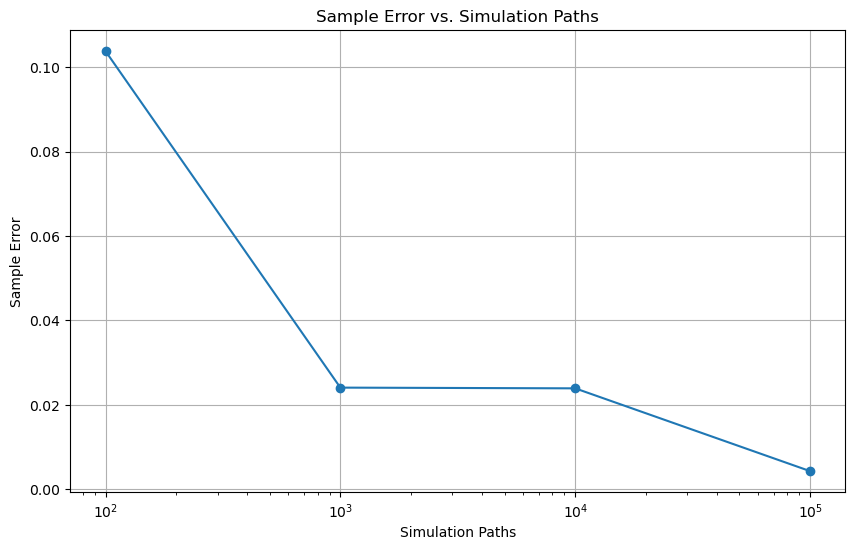

In [14]:
### SAMPLE ERROR ###

# Function to simulate the sample error with given number of simulations
def simulate_option_price(n_simulations):
    # Parameters for the CEV model
    r = 0.1          # Risk-free rate
    sigma = 0.25     # Volatility
    gamma = 1      # Elasticity parameter (CEV parameter)
    S0 = 14          # Initial value of the asset (e.g. stock price)
    T = 0.5          # Time horizon
    N = 500          # Number of time steps
    dt = T / N       # Time step size
    K = 15           # Strike price of the option

    dW = np.random.normal(0, np.sqrt(dt), (n_simulations, N))

    # Simulate paths
    S = np.zeros((n_simulations, N + 1))
    S[:, 0] = S0
    for i in tqdm(range(N)):
        S[:, i+1] = S[:, i] + r * S[:, i] * dt + sigma * S[:, i]**gamma * dW[:, i]

    # Compute the payoff at maturity
    payoffs = np.maximum(S[:, -1] - K, 0)
    mean_payoff = np.mean(payoffs)
    call_option_price = np.exp(-r * T) * mean_payoff
    F = bsexact(sigma, r, K, T, S0)

    sample_error = abs(call_option_price - F)

    return sample_error

# Run simulations with different time steps
n_values = [int(1e2), int(1e3), int(1e4), int(1e5)]
sample_errors = [simulate_option_price(n) for n in n_values]

# Print the results
print("Number of simulations:", n_values)
print("Sample Error:", sample_errors)


# Plot the sample error as a function of the number of simulations
plt.figure(figsize=(10, 6))
plt.semilogx(n_values, sample_errors, 'o-')  # Use semilogx for logarithmic X-axis
plt.title('Sample Error vs. Simulation Paths')
plt.xlabel('Simulation Paths')
plt.ylabel('Sample Error')
plt.grid(True)
plt.show()

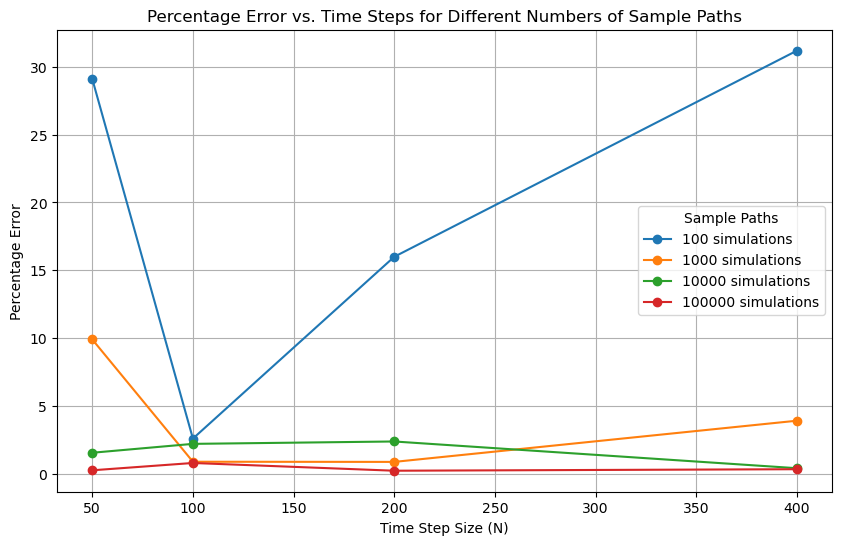

In [29]:
'''
# Function to calculate the percentage error between the simulated call option price and the exact value
def calculate_percentage_error(n_simulations, N):
    # Parameters for the CEV model
    r = 0.1          # Risk-free rate
    sigma = 0.25     # Volatility
    gamma = 1        # Elasticity parameter (CEV parameter)
    S0 = 14          # Initial value of the asset (e.g. stock price)
    T = 0.5          # Time horizon
    K = 15           # Strike price of the option

    dt = T / N
    dW = np.random.normal(0, np.sqrt(dt), (n_simulations, N))

    # Simulate paths
    S = np.zeros((n_simulations, N + 1))
    S[:, 0] = S0
    for i in range(N):
        S[:, i+1] = S[:, i] + r * S[:, i] * dt + sigma * S[:, i]**gamma * dW[:, i]

    # Compute the payoff at maturity
    payoffs = np.maximum(S[:, -1] - K, 0)
    mean_payoff = np.mean(payoffs)
    call_option_price = np.exp(-r * T) * mean_payoff
    F = bsexact(sigma, r, K, T, S0)

    percentage_error = abs((call_option_price - F) / F) * 100  # Percentage error
    return percentage_error

# Define the sample paths and time steps you want to test
n_values = [int(1e2), int(1e3), int(1e4), int(1e5)]
N_values = [50, 100, 200, 400]

# Run the simulation for each combination of sample paths and time steps
percentage_errors = np.zeros((len(n_values), len(N_values)))
for i, n in enumerate(n_values):
    for j, N in enumerate(N_values):
        percentage_errors[i, j] = calculate_percentage_error(n, N)

# Plot the percentage error as curves
plt.figure(figsize=(10, 6))
for i, n in enumerate(n_values):
    plt.plot(N_values, percentage_errors[i, :], 'o-', label=f'{n} simulations')

plt.title('Percentage Error vs. Time Steps for Different Numbers of Sample Paths')
plt.xlabel('Time Step Size (N)')
plt.ylabel('Percentage Error')
plt.legend(title='Sample Paths')
plt.grid(True)
plt.show()
'''

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:09<00:00, 53.30it/s]


Simulation Paths: [100, 1000, 10000, 100000]
Sample Errors with Antithetic Variates: [0.15697915413433894, 0.04828793861581171, 0.008928202478518998, 0.0028524112650958333]


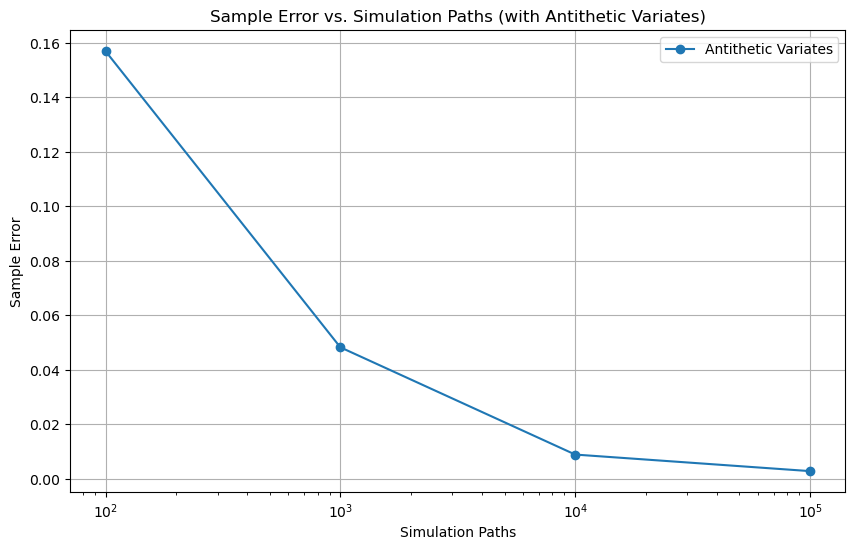

In [6]:
### ANTIHETIC VARIATES ###

def simulate_option_price_antithetic(n_simulations):
    # Parameters for the CEV model
    r = 0.1          # Risk-free rate
    sigma = 0.25     # Volatility
    gamma = 1        # Elasticity parameter (CEV parameter)
    S0 = 14          # Initial value of the asset (e.g. stock price)
    T = 0.5          # Time horizon
    N = 500          # Number of time steps
    dt = T / N       # Time step size
    K = 15           # Strike price of the option

    # Generate standard Brownian motion increments
    dW = np.random.normal(0, np.sqrt(dt), (n_simulations, N))
    dW_antithetic = -dW  # Antithetic variates: simply take the negative of dW

    # Simulate paths for the original and antithetic random variables
    S = np.zeros((n_simulations, N + 1))
    S_antithetic = np.zeros((n_simulations, N + 1))

    S[:, 0] = S0
    S_antithetic[:, 0] = S0

    for i in tqdm(range(N)):
        # Original path
        S[:, i+1] = S[:, i] + r * S[:, i] * dt + sigma * S[:, i]**gamma * dW[:, i]
        # Antithetic path
        S_antithetic[:, i+1] = S_antithetic[:, i] + r * S_antithetic[:, i] * dt + sigma * S_antithetic[:, i]**gamma * dW_antithetic[:, i]

    # Compute payoffs for both original and antithetic paths
    payoffs = np.maximum(S[:, -1] - K, 0)
    payoffs_antithetic = np.maximum(S_antithetic[:, -1] - K, 0)

    # Average the payoffs from original and antithetic paths
    mean_payoff = np.mean((payoffs + payoffs_antithetic) / 2)

    # Discounted payoff (call option price)
    call_option_price = np.exp(-r * T) * mean_payoff

    # Exact price using Black-Scholes formula
    F = bsexact(sigma, r, K, T, S0)

    # Calculate sample error
    sample_error = abs(call_option_price - F)

    return sample_error

# Run simulations with different numbers of paths using antithetic variates
n_values = [int(1e2), int(1e3), int(1e4), int(1e5)]
sample_errors_antithetic = [simulate_option_price_antithetic(n) for n in n_values]

# Print the results
print("Simulation Paths:", n_values)
print("Sample Errors with Antithetic Variates:", sample_errors_antithetic)

# Plot the sample error as a function of the number of simulations using antithetic variates
plt.figure(figsize=(10, 6))
plt.semilogx(n_values, sample_errors_antithetic, 'o-', label="Antithetic Variates")  # Use semilogx for logarithmic X-axis
plt.title('Sample Error vs. Simulation Paths (with Antithetic Variates)')
plt.xlabel('Simulation Paths')
plt.ylabel('Sample Error')
plt.grid(True)
plt.legend()
plt.show()


Time Steps: [100, 250, 500, 1000]
Discretization Errors (Milstein): [0.0018811261983423533, 0.005318973155183371, 0.003920457524290044, 0.0025170513515532233]


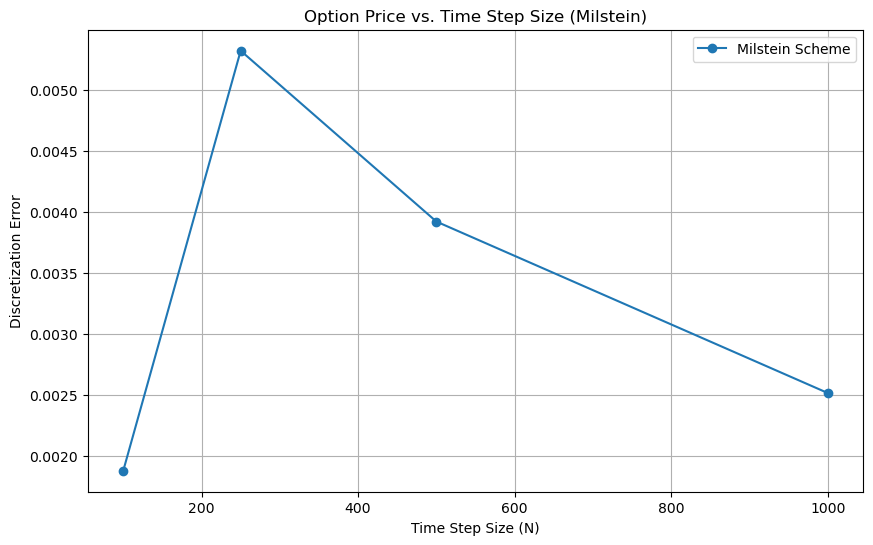

In [15]:
### DISCRETIZATION ERROR WITH MILSTEIN SCHEME ###

# Function to simulate the option price using Milstein scheme with given time steps (N)
def simulate_option_price_milstein(N):
    # Parameters for the CEV model
    r = 0.1          # Risk-free rate
    sigma = 0.25     # Volatility
    gamma = 1        # Elasticity parameter (CEV parameter)
    S0 = 14          # Initial value of the asset (e.g. stock price)
    T = 0.5          # Time horizon
    dt = T / N       # Time step size
    n_simulations = int(1e6)  # Number of simulation paths
    K = 15           # Strike price of the option

    # Generate standard Brownian increments
    dW = np.random.normal(0, np.sqrt(dt), (n_simulations, N))

    # Simulate paths using the Milstein scheme
    S = np.zeros((n_simulations, N + 1))
    S[:, 0] = S0

    for i in range(N):
        S_current = S[:, i]

        # Drift and diffusion terms
        drift = r * S_current
        diffusion = sigma * S_current**gamma

        # Milstein step (includes both drift, diffusion, and the additional correction term)
        S[:, i+1] = S_current + drift * dt + diffusion * dW[:, i] + 0.5 * sigma * gamma * S_current**(gamma-1) * (dW[:, i]**2 - dt)

    # Compute the payoff at maturity
    payoffs = np.maximum(S[:, -1] - K, 0)
    mean_payoff = np.mean(payoffs)
    call_option_price = np.exp(-r * T) * mean_payoff

    # Exact price using Black-Scholes formula
    F = bsexact(sigma, r, K, T, S0)

    # Compute discretization error
    discretization_error = abs(call_option_price - F)
    return discretization_error

# Run simulations with different time steps using Milstein scheme
N_values = [50, 100, 200, 400]
discretization_errors_milstein = [simulate_option_price_milstein(N) for N in N_values]

# Print the results
print("Time Steps:", N_values)
print("Discretization Errors (Milstein):", discretization_errors_milstein)

# Plot the discretization error as a function of the time step size
plt.figure(figsize=(10, 6))
plt.plot(N_values, discretization_errors_milstein, 'o-', label='Milstein Scheme')
plt.title('Discretization Error vs. Time Step Size (Milstein)')
plt.xlabel('Time Step Size (N)')
plt.ylabel('Discretization Error')
plt.grid(True)
plt.legend()
plt.show()

100%|██████████| 1000/1000 [00:11<00:00, 83.35it/s]


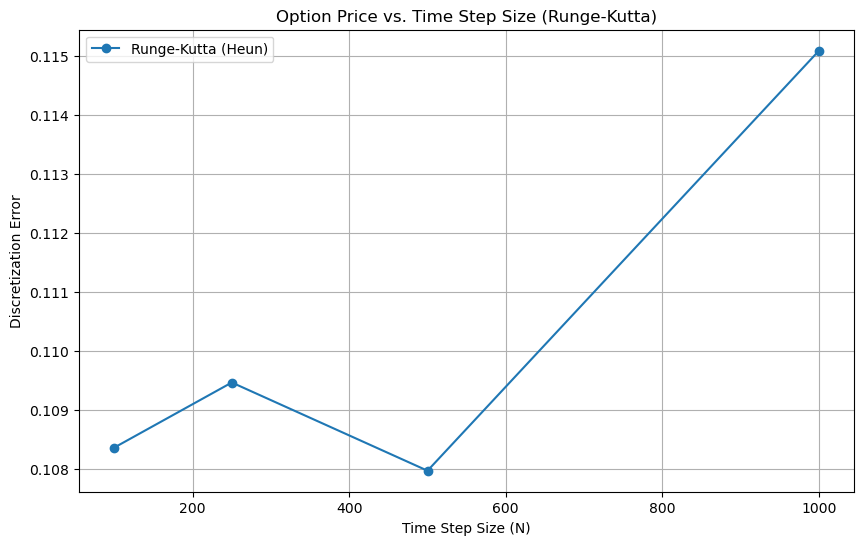

In [7]:
### DISCRETIZATION ERROR WITH RUNGE-KUTTA ###

# Function to simulate the option price using Runge-Kutta (Heun's method) with given time steps (N)
def simulate_option_price_runge_kutta(N):
    # Parameters for the CEV model
    r = 0.1          # Risk-free rate
    sigma = 0.25     # Volatility
    gamma = 1        # Elasticity parameter (CEV parameter)
    S0 = 14          # Initial value of the asset (e.g. stock price)
    T = 0.5          # Time horizon
    dt = T / N       # Time step size
    n_simulations = int(1e6)  # Number of simulation paths
    K = 15           # Strike price of the option

    # Generate standard Brownian increments
    dW = np.random.normal(0, np.sqrt(dt), (n_simulations, N))

    # Simulate paths using Runge-Kutta 2nd order (Heun's method)
    S = np.zeros((n_simulations, N + 1))
    S[:, 0] = S0

    for i in tqdm(range(N)):
        S_current = S[:, i]

        # Euler-Maruyama step (predictor)
        drift = r * S_current
        diffusion = sigma * S_current**gamma
        S_predict = S_current + drift * dt + diffusion * dW[:, i]

        # Drift and diffusion for the predictor step
        drift_predict = r * S_predict
        diffusion_predict = sigma * S_predict**gamma

        # Heun's method (corrector)
        S[:, i+1] = S_current + 0.5 * (drift + drift_predict) * dt + 0.5 * (diffusion + diffusion_predict) * dW[:, i]

    # Compute the payoff at maturity
    payoffs = np.maximum(S[:, -1] - K, 0)
    mean_payoff = np.mean(payoffs)
    call_option_price = np.exp(-r * T) * mean_payoff

    # Exact price using Black-Scholes formula
    F = bsexact(sigma, r, K, T, S0)

    # Compute discretization error
    discretization_error = abs(call_option_price - F)
    return discretization_error

# Run simulations with different time steps using Runge-Kutta (Heun's method)
N_values = [50, 100, 200, 400]
discretization_errors_runge_kutta = [simulate_option_price_runge_kutta(N) for N in N_values]

# Print the results
print("Time Steps:", N_values)
print("Discretization Errors (Runge-Kutta):", discretization_errors_runge_kutta)

# Plot the discretization error as a function of the time step size
plt.figure(figsize=(10, 6))
plt.plot(N_values, discretization_errors_runge_kutta, 'o-', label='Runge-Kutta (Heun)')
plt.title('Discretization Error vs. Time Step Size (Runge-Kutta)')
plt.xlabel('Time Step Size (N)')
plt.ylabel('Discretization Error')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\pontu\AppData\Local\Temp\ipykernel_20904\1730380701.py:29: RuntimeWarning: invalid value encountered in power
  diffusion_predict = sigma * S_predict**gamma
C:\Users\pontu\AppData\Local\Temp\ipykernel_20904\1730380701.py:24: RuntimeWarning: overflow encountered in power
  diffusion = sigma * S_current**gamma
C:\Users\pontu\AppData\Local\Temp\ipykernel_20904\1730380701.py:25: RuntimeWarning: invalid value encountered in add
  S_predict = S_current + drift * dt + diffusion * dW[:, i]
C:\Users\pontu\AppData\Local\Temp\ipykernel_20904\1730380701.py:29: RuntimeWarning: overflow encountered in power
  diffusion_predict = sigma * S_predict**gamma
C:\Users\pontu\AppData\Local\Temp\ipykernel_20904\1730380701.py:29: RuntimeWarning: overflow encountered in square
  diffusion_predict = sigma * S_predict**gamma
C:\Users\pontu\AppData\Local\Temp\ipykernel_20904\1730380701.py:24: RuntimeWarning: overflow encountered in square
  diffusion = sigma * S_current**gamma


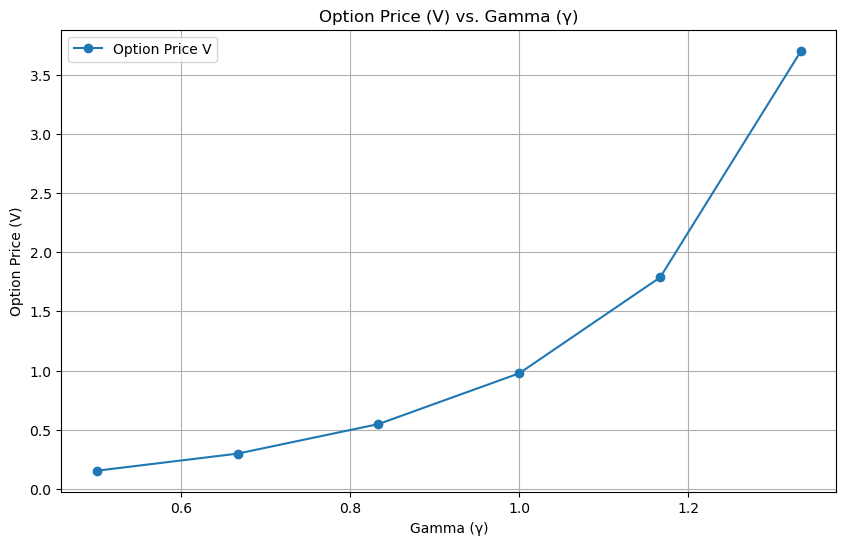

In [8]:
### GAMMA SENSITIVITY ###

# Function to compute the option price as a function of gamma
def compute_option_price_for_gamma(gamma, N=500):
    # Parameters for the CEV model
    r = 0.1          # Risk-free rate
    sigma = 0.25     # Volatility
    S0 = 14          # Initial value of the asset (e.g. stock price)
    T = 0.5          # Time horizon
    dt = T / N       # Time step size
    n_simulations = int(1e6)  # Number of simulation paths
    K = 15           # Strike price of the option

    # Generate standard Brownian increments
    dW = np.random.normal(0, np.sqrt(dt), (n_simulations, N))

    # Simulate paths using Runge-Kutta 2nd order (Heun's method)
    S = np.zeros((n_simulations, N + 1))
    S[:, 0] = S0

    for i in range(N):
        S_current = S[:, i]

        # Euler-Maruyama step (predictor)
        drift = r * S_current
        diffusion = sigma * S_current**gamma
        S_predict = S_current + drift * dt + diffusion * dW[:, i]

        # Drift and diffusion for the predictor step
        drift_predict = r * S_predict
        diffusion_predict = sigma * S_predict**gamma

        # Heun's method (corrector)
        S[:, i+1] = S_current + 0.5 * (drift + drift_predict) * dt + 0.5 * (diffusion + diffusion_predict) * dW[:, i]

    # Compute the payoff at maturity
    payoffs = np.maximum(S[:, -1] - K, 0)
    mean_payoff = np.mean(payoffs)
    call_option_price = np.exp(-r * T) * mean_payoff

    return call_option_price

# Range of gamma values to test
gamma_values = np.linspace(0.5, 1.0, 10)  # Change the range as needed
option_prices = [compute_option_price_for_gamma(gamma) for gamma in gamma_values]

#Print the results
print("Gamma Values:", gamma_values)
print("Option Prices:", option_prices)

# Plot the option price as a function of gamma
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, option_prices, 'o-', label='Option Price V')
plt.title('Option Price (V) vs. Gamma (γ)')
plt.xlabel('Gamma (γ)')
plt.ylabel('Option Price (V)')
plt.grid(True)
plt.legend()
plt.show()